In [53]:
%matplotlib inline

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [55]:
path = '~/Documents/dmproject/datasets/'

In [56]:
df = pd.read_csv(path + 'new_features.csv')

In [57]:
# Drop the id column, it' s not necessary to the classification task
df.drop(df.columns[0], axis=1, inplace=True)

In [58]:
df

,TotalItems,DistinctItems,MaxItems,Entropy,TotalSale,Frequency,CustomerCountry,MonthSale,WeekSale,MonthFrequency,WeekFrequency,Recency,MonthItems,WeekItems,MonthDistinctItems,WeekDistinctItems,EntropyMonth,EntropyWeek
0,1135,82,316,6.114,342.22,131,Iceland,34.222,7.778,13.100,2.977,40,113.500,25.795,12.600,2.977,2.156,2.499
1,436,50,436,5.644,117.96,50,Italy,10.724,2.510,4.545,1.064,19,39.636,9.277,4.545,1.064,1.000,1.000
2,172,15,172,3.907,24.45,15,Norway,12.225,4.890,7.500,3.000,311,86.000,34.400,7.500,3.000,1.000,1.000
3,413,45,119,5.286,180.70,66,Norway,20.078,4.633,7.333,1.692,73,45.889,10.590,5.333,1.513,1.839,2.761
4,14,2,14,1.000,4.40,2,Bahrain,0.880,0.220,0.400,0.100,204,2.800,0.700,0.400,0.100,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,37,7,37,2.807,23.85,7,United Kingdom,3.407,0.917,1.000,0.269,160,5.286,1.423,1.000,0.269,1.000,1.000
4148,52,5,52,2.322,5.46,5,United Kingdom,0.455,0.111,0.417,0.102,4,4.333,1.061,0.417,0.102,1.000,1.000
4149,44,8,26,3.000,17.39,8,United Kingdom,1.932,0.483,0.889,0.222,93,4.889,1.222,0.889,0.222,1.296,1.296
4150,1351,257,241,7.469,1119.53,715,United Kingdom,101.775,23.324,65.000,14.896,10,122.818,28.146,50.909,14.208,2.736,3.717


## Threshold picking to assign labels

/home/raffaele/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MonthSale')

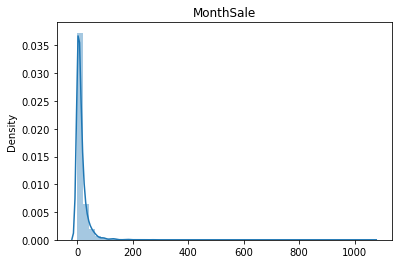

In [59]:
x = df[["MonthSale"]].dropna()
sns.distplot(x);
plt.title('MonthSale')

In [60]:
df['MonthSale'].describe()

count    4152.000000
mean       15.761676
std        32.523797
min         0.046000
25%         3.543000
50%         8.416000
75%        18.287000
max      1059.828000
Name: MonthSale, dtype: float64

In [71]:
np.percentile(df['MonthSale'], 75)

18.287

In [72]:
# Inseriamo le label in base alla distribuzione,
# la mia idea é di mettere <5 basso spendente
# <20 medio spendente
# >20 alto spendente

def customer_label(row):
    new = []
    for sale in row:
        if sale <=np.percentile(df['MonthSale'], 35):
            new.append(0)
        elif sale <=np.percentile(df['MonthSale'], 75):
            new.append(1)
        elif sale >np.percentile(df['MonthSale'], 75):
            new.append(2)
            
    return new

In [73]:
df['CustomerLabel'] = customer_label(df['MonthSale'])

In [74]:
df.sample(20)

,TotalItems,DistinctItems,MaxItems,Entropy,TotalSale,Frequency,CustomerCountry,MonthSale,WeekSale,MonthFrequency,WeekFrequency,Recency,MonthItems,WeekItems,MonthDistinctItems,WeekDistinctItems,EntropyMonth,EntropyWeek,CustomerLabel
2507,50,5,50,2.322,7.92,5,United Kingdom,1.320,0.330,0.833,0.208,174,8.333,2.083,0.833,0.208,1.000,1.000,0
505,184,17,120,4.037,41.33,19,United Kingdom,4.592,1.088,2.111,0.500,81,20.444,4.842,2.111,0.500,0.996,1.459,0
615,1483,148,408,7.122,365.61,172,United Kingdom,30.467,7.312,14.333,3.440,11,123.583,29.660,14.333,3.440,2.274,2.514,2
2257,64,9,64,3.170,23.95,9,United Kingdom,3.421,0.921,1.286,0.346,160,9.143,2.462,1.286,0.346,1.000,1.000,0
2128,617,54,202,5.639,163.06,71,United Kingdom,14.824,3.706,6.455,1.614,30,56.091,14.023,6.455,1.614,2.329,2.436,1
3306,1259,143,297,6.890,565.17,269,United Kingdom,94.195,25.690,44.833,12.227,190,209.833,57.227,42.167,12.000,2.221,2.425,2
2400,269,30,189,4.875,75.12,32,United Kingdom,12.520,3.415,5.333,1.455,188,44.833,12.227,5.333,1.455,0.939,0.939,1
887,47,8,26,3.000,20.88,8,United Kingdom,2.088,0.522,0.800,0.200,66,4.700,1.175,0.800,0.200,1.764,1.764,0
1340,727,66,126,5.835,283.45,100,United Kingdom,23.621,5.669,8.333,2.000,92,60.583,14.540,7.917,1.980,2.890,3.273,2
2351,70,7,54,2.807,17.10,7,United Kingdom,1.425,0.342,0.583,0.140,2,5.833,1.400,0.583,0.140,1.000,0.918,0


In [75]:
labels =['low-spending',
         'medium-spending',
         'high-spending',]
df['CustomerLabel'].value_counts()

1    1661
0    1453
2    1038
Name: CustomerLabel, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb78b3d9a90>,
 [Text(0.3397603851174421, 1.0462135922959745, 'low-spending'),
  Text(-0.9800315979771178, -0.49953785338692513, 'medium-spending'),
  Text(0.7778174593052022, -0.7778174593052025, 'high-spending')],
 [Text(0.1853238464276957, 0.5706619594341679, '40%'),
  Text(-0.5345626898057005, -0.27247519275650456, '35%'),
  Text(0.4242640687119284, -0.4242640687119286, '25%')])

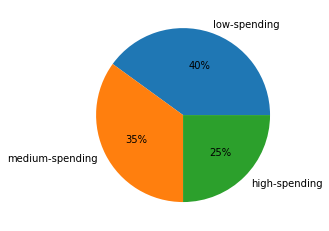

In [76]:
explode = (0, 0, 0)
plt.pie(df['CustomerLabel'].value_counts(), labels = labels, autopct='%1.0f%%', explode=explode )

In [77]:
df['CustomerLabel'] = df['CustomerLabel'].replace(0,'low-spending')
df['CustomerLabel'] = df['CustomerLabel'].replace(1,'medium-spending')
df['CustomerLabel'] = df['CustomerLabel'].replace(2,'high-spending')

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

In [80]:
# # saving the dataframe 
X_train.to_csv('../datasets/train.csv', index=False) 
X_test.to_csv('../datasets/test.csv', index=False) 